In [91]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_path = "data/laureates-1000.json"

In [5]:
with open(file_path, 'r') as file:
    data = json.load(file)

In [6]:
laureates = data['laureates']

In [88]:
len(laureates)

992

In [66]:
laureates[:1]

[{'id': '745',
  'knownName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'givenName': {'en': 'A. Michael', 'se': 'A. Michael'},
  'familyName': {'en': 'Spence', 'se': 'Spence'},
  'fullName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'fileName': 'spence',
  'gender': 'male',
  'birth': {'date': '1943-00-00',
   'place': {'city': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ'},
    'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
    'cityNow': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ',
     'sameAs': ['https://www.wikidata.org/wiki/Q678437',
      'https://www.wikipedia.org/wiki/Montclair,_New_Jersey'],
     'latitude': '40.825930',
     'longitude': '-74.209030'},
    'countryNow': {'en': 'USA',
     'no': 'USA',
     'se': 'USA',
     'sameAs': ['https://www.wikidata.org/wiki/Q30'],
     'latitude': '39.828175',
     'longitude': '-98.579500'},
    'continent': {'en': 'North America

In [110]:
# Create a list to hold our extracted data
extracted_data = []

# Iterate over each laureate to extract gender and awardYear information
for laureate in laureates:
    gender = laureate.get('gender')
    # Remove entries that do not have a gender as these will be a group award
    if gender:
      knownName = laureate.get('knownName', {})
      name = knownName.get('en', 'unknown')
      links = laureate.get('links', {})
      href = links[0].get('href', 'unknown')
      for prize in laureate.get('nobelPrizes', []):
          year = prize.get('awardYear')
          category = prize.get('category', {})
          if category:
            category = category.get('en', 'unknown')
          motivation = prize.get('motivation', {})
          if motivation:
            motivation = motivation.get('en', 'unknown')
          if year:
              extracted_data.append({'year': int(year), 'gender': gender, 'name': name, 'href': href, 'category': category, 'motivation': motivation})

In [74]:
# Convert the list to a DataFrame
df = pd.DataFrame(extracted_data)

In [75]:
df.head()

,year,gender,name,href,category,motivation
0,2001,male,A. Michael Spence,https://api.nobelprize.org/2/laureate/745,Economic Sciences,for their analyses of markets with asymmetric ...
1,1975,male,Aage N. Bohr,https://api.nobelprize.org/2/laureate/102,Physics,for the discovery of the connection between co...
2,2004,male,Aaron Ciechanover,https://api.nobelprize.org/2/laureate/779,Chemistry,for the discovery of ubiquitin-mediated protei...
3,1982,male,Aaron Klug,https://api.nobelprize.org/2/laureate/259,Chemistry,for his development of crystallographic electr...
4,2021,male,Abdulrazak Gurnah,https://api.nobelprize.org/2/laureate/1004,Literature,for his uncompromising and compassionate penet...


In [49]:
# Group by year and gender, and count the occurrences
gender_distribution = df.groupby(by=['year', 'gender'])
gender_distribution.head()

,year,gender,name,href
0,2001,male,A. Michael Spence,https://api.nobelprize.org/2/laureate/745
1,1975,male,Aage N. Bohr,https://api.nobelprize.org/2/laureate/102
2,2004,male,Aaron Ciechanover,https://api.nobelprize.org/2/laureate/779
3,1982,male,Aaron Klug,https://api.nobelprize.org/2/laureate/259
4,2021,male,Abdulrazak Gurnah,https://api.nobelprize.org/2/laureate/1004
...,...,...,...,...
942,1949,male,William F. Giauque,https://api.nobelprize.org/2/laureate/209
952,1955,male,Willis E. Lamb,https://api.nobelprize.org/2/laureate/63
955,1996,female,Wisława Szymborska,https://api.nobelprize.org/2/laureate/673
956,1924,male,Władysław Reymont,https://api.nobelprize.org/2/laureate/594


In [26]:
gender_size = gender_distribution.size()
gender_size.head()

year  gender
1901  male      6
1902  male      7
1903  female    1
      male      6
1904  male      5
dtype: int64

In [30]:
gender_unstack = gender_size.unstack(fill_value=0)
gender_unstack.head()

gender,female,male
year,,
1901,0,6
1902,0,7
1903,1,6
1904,0,5
1905,1,4


In [34]:
# Add a column for the total number of laureates
gender_unstack['total'] = gender_unstack.sum(axis=1)

In [39]:
gender_unstack.head()

gender,female,male,total
year,,,
1901,0,6,6
1902,0,7,7
1903,1,6,7
1904,0,5,5
1905,1,4,5


In [42]:
# Add a new column for the percentage of winners which are male per year
gender_unstack["male_percentage"] = gender_unstack["male"] / gender_unstack["total"]
gender_unstack["female_percentage"] = gender_unstack["female"] / gender_unstack["total"]

In [47]:
gender_unstack.sort_index(inplace=True)

In [48]:
gender_unstack.head()

gender,female,male,total,male_percentage,female_percentage
year,,,,,
1901,0,6,6,1.000000,0.000000
1902,0,7,7,1.000000,0.000000
1903,1,6,7,0.857143,0.142857
1904,0,5,5,1.000000,0.000000
1905,1,4,5,0.800000,0.200000


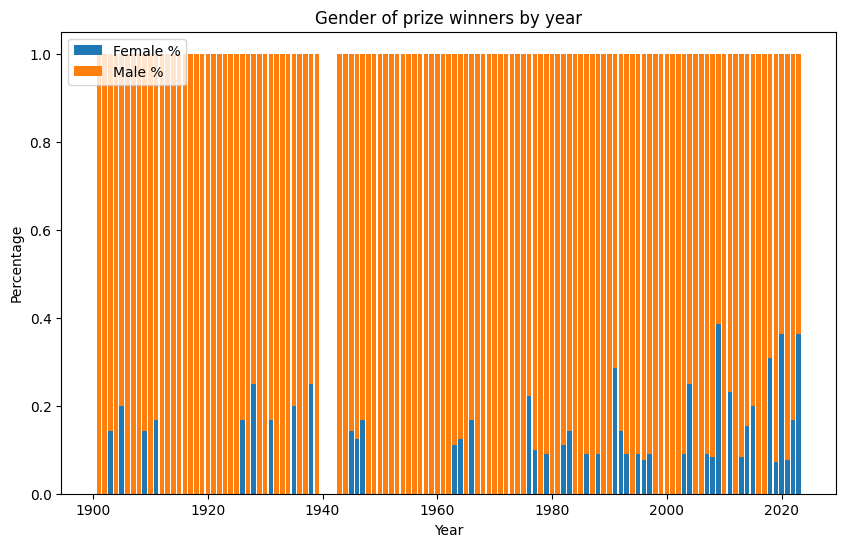

In [60]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_unstack.index, gender_unstack['female_percentage'], label='Female %')
plt.bar(gender_unstack.index, gender_unstack['male_percentage'], bottom=gender_unstack['female_percentage'], label='Male %')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Gender of prize winners by year')
plt.legend(loc='upper left')

plt.show()

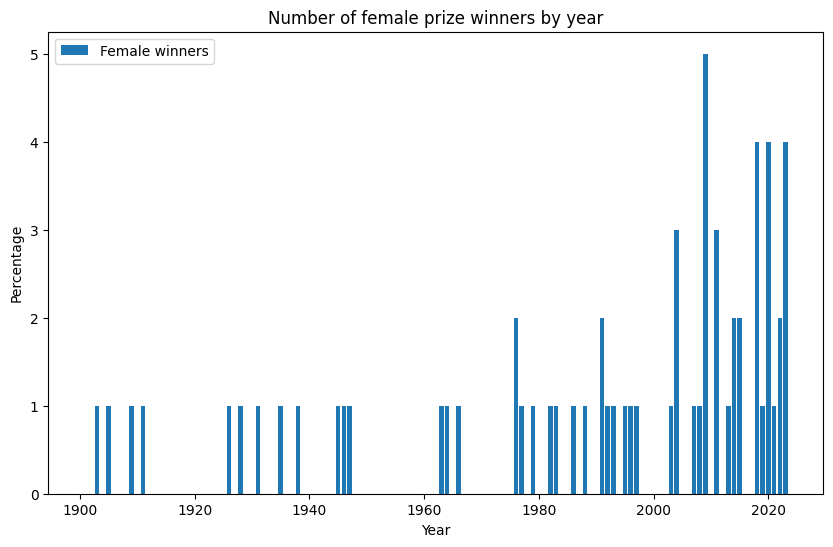

In [61]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_unstack.index, gender_unstack['female'], label='Female winners')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Number of female prize winners by year')
plt.legend(loc='upper left')

plt.show()

In [76]:
female_winners = df[df['gender'] == "female"]

In [108]:
# Save the gemale_winners data to a CSV file
file_path = 'data/female-winners.csv'
female_winners.to_csv(file_path, index=False)

<Axes: title={'center': 'Female prizes by category'}, xlabel='category'>

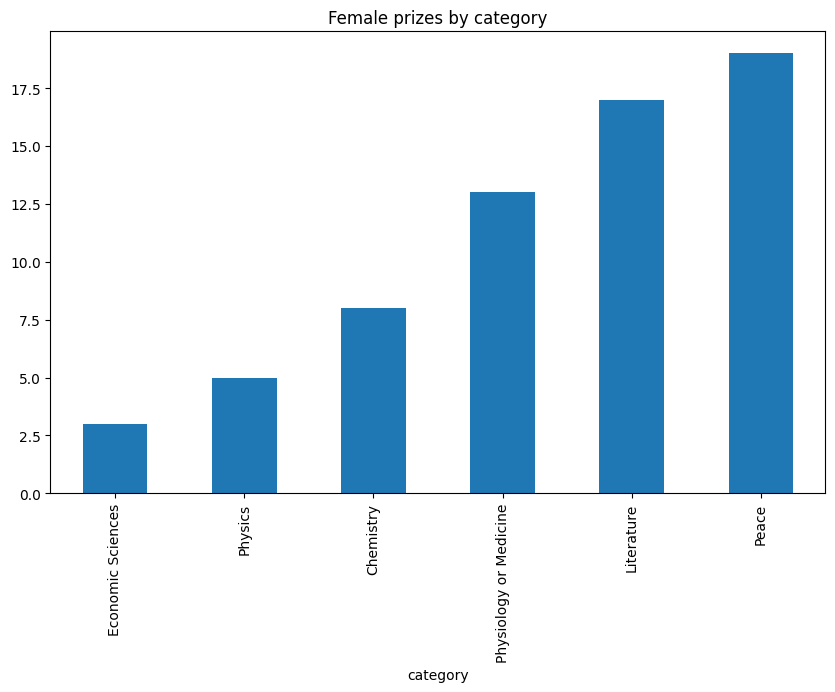

In [86]:
female_winners.groupby('category').size().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Female prizes by category')

<Axes: title={'center': 'Male prizes by category'}, xlabel='category'>

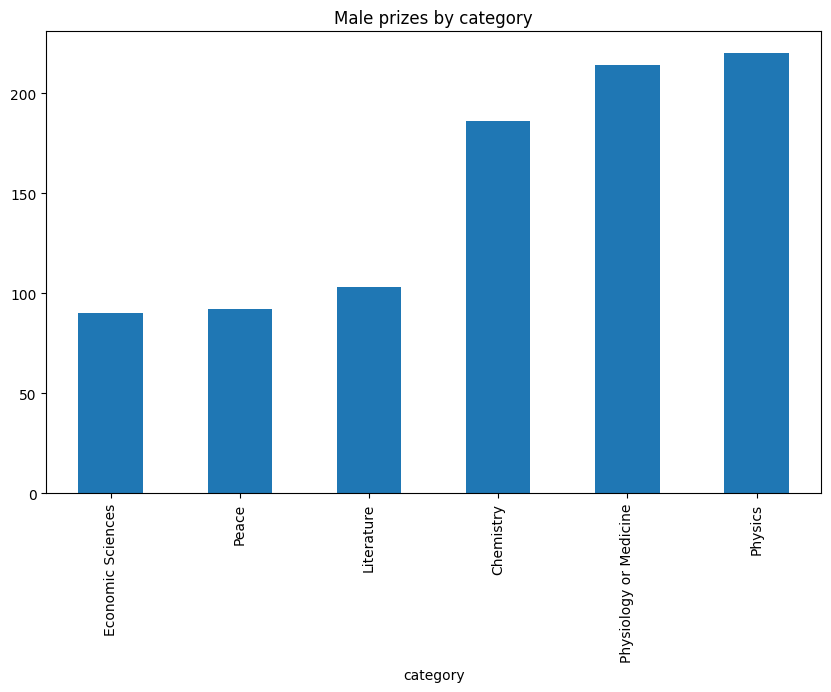

In [87]:
df[df['gender'] == "male"].groupby('category').size().sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Male prizes by category')

In [92]:
# Group by 'gender' and 'category' and calculate the sum
category_grouped = df.groupby(['gender', 'category']).size().unstack(fill_value=0)

In [93]:
category_grouped.head()

category,Chemistry,Economic Sciences,Literature,Peace,Physics,Physiology or Medicine
gender,,,,,,
female,8,3,17,19,5,13
male,186,90,103,92,220,214


In [94]:
# Create an array with the positions of the bars on the x axis
x = np.arange(len(category_grouped.columns))

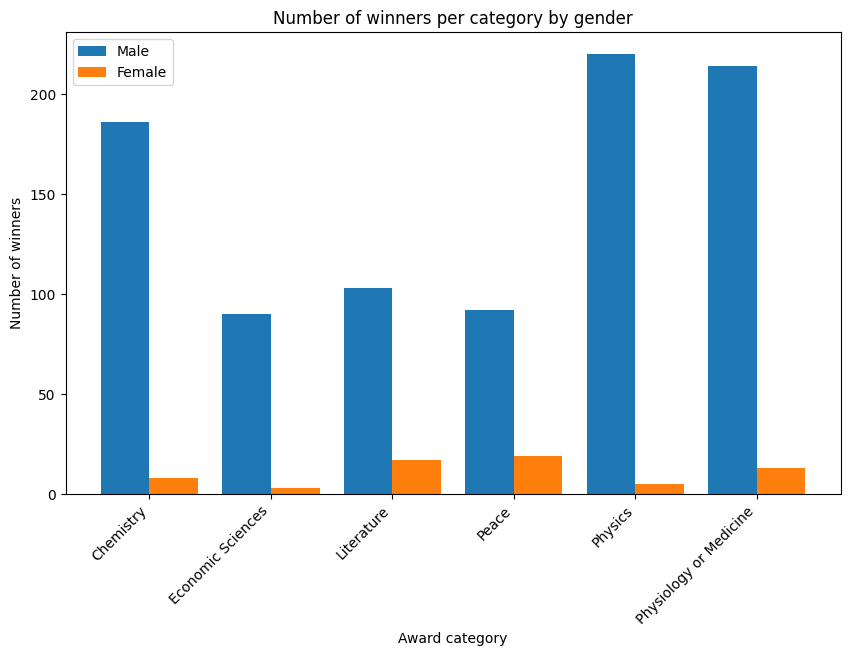

In [107]:
plt.figure(figsize=(10, 6))
# Plot the 'male' bars
plt.bar(x - 0.2, category_grouped.loc['male'], width=0.4, label='Male')
# Plot the 'female' bars
plt.bar(x + 0.2, category_grouped.loc['female'], width=0.4, label='Female')
# Replace the x ticks with the category names
plt.xticks(x, category_grouped.columns, rotation=45, ha='right')

plt.xlabel('Award category')
plt.ylabel('Number of winners')
plt.title('Number of winners per category by gender')
plt.legend(loc='upper left')

plt.show()